Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load dataset

In [2]:
exp_data=pd.read_csv('../data/dvg_climate_chamber_exp_final_data.csv')
exp_data['bmi'] = exp_data['weight']/((exp_data['height']/100)**2) 

Data Exploration

In [3]:
exp_data.head()

,user_id,lastdata,therm_sens,therm_comfort,therm_pref,therm_accep,met,air_quality,air_velocity,humidity,...,avg_globe_temp,avg_testo_hum,avg_testo_temp1,avg_testo_temp2,avg_co2,avg_velocity,avg_temp_out,avg_hum_out,clo,bmi
0,FA872888,2023-11-29 11:10:42.000,4.0,5,1,1,1.2,3,3,4,...,18.29,39.77,18.63,18.67,732.9,0.038,1.336667,94.704930,1.35,22.832879
1,MD189828,2023-11-29 11:18:22.000,3.0,3,3,1,1.0,4,4,4,...,18.60,38.19,18.93,19.07,765.7,0.038,1.390000,94.639374,0.88,37.448347
2,FA872888,2023-11-29 11:19:55.000,5.0,4,1,1,1.2,3,3,4,...,18.63,38.02,18.96,19.10,763.3,0.039,1.396667,94.631180,1.35,22.832879
3,MD189828,2023-11-29 11:21:42.000,3.0,4,3,1,1.0,5,4,4,...,18.65,37.74,18.97,19.13,756.8,0.044,1.410000,94.614791,0.88,37.448347
4,MB654888,2023-11-29 11:23:54.000,3.0,4,3,1,1.0,5,5,4,...,19.35,32.49,18.60,19.34,641.1,0.035,1.423333,94.598402,0.89,22.351743


In [4]:
exp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            1502 non-null   object 
 1   lastdata           1502 non-null   object 
 2   therm_sens         1502 non-null   float64
 3   therm_comfort      1502 non-null   int64  
 4   therm_pref         1502 non-null   int64  
 5   therm_accep        1502 non-null   int64  
 6   met                1502 non-null   float64
 7   air_quality        1502 non-null   int64  
 8   air_velocity       1502 non-null   int64  
 9   humidity           1502 non-null   int64  
 10  overall_comfort    1449 non-null   float64
 11  tiredness          1502 non-null   int64  
 12  age                1502 non-null   int64  
 13  birth_year         1502 non-null   int64  
 14  gender             1502 non-null   int64  
 15  weight             1502 non-null   int64  
 16  sleeping_hours     1502 

In [5]:
exp_data.shape

(1502, 42)

In [6]:
exp_data.describe()

,therm_sens,therm_comfort,therm_pref,therm_accep,met,air_quality,air_velocity,humidity,overall_comfort,tiredness,...,avg_globe_temp,avg_testo_hum,avg_testo_temp1,avg_testo_temp2,avg_co2,avg_velocity,avg_temp_out,avg_hum_out,clo,bmi
count,1502.000000,1502.000000,1502.000000,1502.000000,1502.00000,1502.000000,1502.000000,1502.000000,1449.000000,1502.000000,...,1502.000000,1502.000000,1502.000000,1316.000000,1502.000000,1316.000000,1502.000000,1502.000000,1502.000000,1502.000000
mean,4.120506,3.976698,2.061252,1.139814,1.05273,3.752330,3.966711,3.678429,3.995169,3.452730,...,23.273644,36.196402,23.100670,23.103830,676.964133,0.060668,4.611029,83.696705,0.861565,26.044611
std,1.179773,1.185686,0.779640,0.346909,0.16427,1.022683,1.136968,0.807065,1.170236,0.614148,...,3.525380,6.801567,3.641518,3.397525,75.015118,0.034136,4.006318,8.870293,0.283155,5.199620
min,1.000000,1.000000,1.000000,1.000000,0.80000,1.000000,1.000000,1.000000,1.000000,1.000000,...,16.620000,23.060000,16.660000,16.970000,420.800000,0.000000,-2.495000,66.803553,0.290000,19.047004
25%,3.000000,3.000000,1.000000,1.000000,1.00000,3.000000,3.000000,3.000000,3.000000,3.000000,...,20.272500,31.120000,19.962500,20.250000,632.700000,0.040000,2.017208,75.848491,0.680000,22.832879
50%,4.000000,4.000000,2.000000,1.000000,1.00000,4.000000,4.000000,4.000000,4.000000,4.000000,...,23.400000,36.010000,22.810000,22.635000,674.000000,0.056000,4.034792,83.988680,0.880000,24.691358
75%,5.000000,5.000000,3.000000,1.000000,1.00000,4.000000,5.000000,4.000000,5.000000,4.000000,...,26.270000,40.497500,26.260000,25.940000,715.000000,0.075000,8.702846,91.238453,1.010000,27.681661
max,7.000000,6.000000,3.000000,2.000000,2.00000,7.000000,7.000000,7.000000,6.000000,4.000000,...,31.830000,61.070000,31.140000,31.420000,975.400000,0.257000,10.637920,99.284170,1.350000,42.669153


In [7]:
exp_data.columns

Index(['user_id', 'lastdata', 'therm_sens', 'therm_comfort', 'therm_pref',
       'therm_accep', 'met', 'air_quality', 'air_velocity', 'humidity',
       'overall_comfort', 'tiredness', 'age', 'birth_year', 'gender', 'weight',
       'sleeping_hours', 'height', 'health_status', 'residential_years',
       'room_id', 'avg_wrist_st', 'avg_ankle_st', 'avg_heartrate',
       'avg_temp01', 'avg_temp06', 'avg_temp11', 'avg_temp17', 'avg_hum01',
       'avg_hum06', 'avg_hum11', 'avg_hum17', 'avg_globe_temp',
       'avg_testo_hum', 'avg_testo_temp1', 'avg_testo_temp2', 'avg_co2',
       'avg_velocity', 'avg_temp_out', 'avg_hum_out', 'clo', 'bmi'],
      dtype='object')

In [8]:
exp_data.dtypes

user_id               object
lastdata              object
therm_sens           float64
therm_comfort          int64
therm_pref             int64
therm_accep            int64
met                  float64
air_quality            int64
air_velocity           int64
humidity               int64
overall_comfort      float64
tiredness              int64
age                    int64
birth_year             int64
gender                 int64
weight                 int64
sleeping_hours       float64
height                 int64
health_status          int64
residential_years      int64
room_id                int64
avg_wrist_st         float64
avg_ankle_st         float64
avg_heartrate        float64
avg_temp01           float64
avg_temp06           float64
avg_temp11           float64
avg_temp17           float64
avg_hum01            float64
avg_hum06            float64
avg_hum11            float64
avg_hum17            float64
avg_globe_temp       float64
avg_testo_hum        float64
avg_testo_temp

In [9]:
exp_data.isna().sum()

user_id                0
lastdata               0
therm_sens             0
therm_comfort          0
therm_pref             0
therm_accep            0
met                    0
air_quality            0
air_velocity           0
humidity               0
overall_comfort       53
tiredness              0
age                    0
birth_year             0
gender                 0
weight                 0
sleeping_hours         0
height                 0
health_status          0
residential_years      0
room_id                0
avg_wrist_st           1
avg_ankle_st           1
avg_heartrate          1
avg_temp01           124
avg_temp06           119
avg_temp11           117
avg_temp17           125
avg_hum01            124
avg_hum06            119
avg_hum11            117
avg_hum17            125
avg_globe_temp         0
avg_testo_hum          0
avg_testo_temp1        0
avg_testo_temp2      186
avg_co2                0
avg_velocity         186
avg_temp_out           0
avg_hum_out            0


In [10]:
exp_data.duplicated().sum()

np.int64(0)

In [11]:
exp_data.nunique()

user_id                22
lastdata             1491
therm_sens              7
therm_comfort           6
therm_pref              3
therm_accep             2
met                     6
air_quality             7
air_velocity            7
humidity                7
overall_comfort         6
tiredness               4
age                    15
birth_year             16
gender                  2
weight                 23
sleeping_hours          7
height                 20
health_status           2
residential_years       4
room_id                 2
avg_wrist_st          726
avg_ankle_st          588
avg_heartrate        1472
avg_temp01            342
avg_temp06            321
avg_temp11            336
avg_temp17            330
avg_hum01              65
avg_hum06              70
avg_hum11              72
avg_hum17              71
avg_globe_temp        749
avg_testo_hum         932
avg_testo_temp1       770
avg_testo_temp2       674
avg_co2               915
avg_velocity          173
avg_temp_out

Distinct Participants Information

In [12]:
participants = exp_data.drop_duplicates(subset="user_id")
print("Age:", participants["age"].agg(["mean", "std", "min", "max"]))
print("Weight:", participants["weight"].agg(["mean", "std", "min", "max"]))
print("Height:", participants["height"].agg(["mean", "std", "min", "max"]))
print("BMI:", participants["bmi"].agg(["mean", "std", "min", "max"]))
print("Clo:", participants["clo"].agg(["mean", "std", "min", "max"]))
print("Met:", participants["met"].agg(["mean", "std", "min", "max"]))

bins = [20, 35, 50, 70]
labels = ['Young adults (21-35)', 'Middle-aged (36-50)', 'Older adults (51-67)']
participants['age_group'] = pd.cut(participants['age'], bins=bins, labels=labels)
print("\nAge Group Distribution:")
print(participants['age_group'].value_counts())

bmi_bins = [0, 24.9, 29.9, float('inf')]
bmi_labels = ['Normal (18.5-24.9)', 'Overweight (25-29.9)', 'Obese (≥30)']
participants['bmi_category'] = pd.cut(participants['bmi'], bins=bmi_bins, labels=bmi_labels)
print("\nBMI Categories:")
print(participants['bmi_category'].value_counts())

print("\nGender Distribution:")
print(participants["gender"].value_counts())

if "residential_years" in participants.columns:
    print("\nLocal Residency:")
    print(participants["residential_years"].value_counts())

if "health_status" in participants.columns:
    print("\nHealth Status:")
    print(participants["health_status"].value_counts())


Age: mean    35.272727
std     14.511676
min     21.000000
max     67.000000
Name: age, dtype: float64
Weight: mean     76.318182
std      14.607194
min      54.000000
max     116.000000
Name: weight, dtype: float64
Height: mean    173.227273
std       9.753787
min     155.000000
max     188.000000
Name: height, dtype: float64
BMI: mean    25.402812
std      4.295517
min     19.047004
max     37.448347
Name: bmi, dtype: float64
Clo: mean    0.894091
std     0.265360
min     0.390000
max     1.350000
Name: clo, dtype: float64
Met: mean    1.109091
std     0.234844
min     1.000000
max     1.700000
Name: met, dtype: float64

Age Group Distribution:
age_group
Young adults (21-35)    17
Older adults (51-67)     4
Middle-aged (36-50)      1
Name: count, dtype: int64

BMI Categories:
bmi_category
Normal (18.5-24.9)      11
Overweight (25-29.9)     8
Obese (≥30)              3
Name: count, dtype: int64

Gender Distribution:
gender
2    11
1    11
Name: count, dtype: int64

Local Residency:
re

C:\Users\jod\AppData\Local\Temp\ipykernel_32640\2457808546.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  participants['age_group'] = pd.cut(participants['age'], bins=bins, labels=labels)
C:\Users\jod\AppData\Local\Temp\ipykernel_32640\2457808546.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  participants['bmi_category'] = pd.cut(participants['bmi'], bins=bmi_bins, labels=bmi_labels)


In [13]:

table1 = {
    "Sample size": len(participants),
    "Age (Mean, SD)": f"{participants['age'].mean():.2f} ({participants['age'].std():.2f})",
    "Age Range": f"{participants['age'].min()}–{participants['age'].max()}",
    "Young adults (21-35)": f"{(participants['age'] <= 35).sum()} ({(participants['age'] <= 35).mean() * 100:.0f}%)",
    "Middle-aged (36-50)": f"{((participants['age'] > 35) & (participants['age'] <= 50)).sum()} ({((participants['age'] > 35) & (participants['age'] <= 50)).mean() * 100:.0f}%)",
    "Older adults (51-67)": f"{(participants['age'] > 50).sum()} ({(participants['age'] > 50).mean() * 100:.0f}%)",
    "Sex (Male)": f"{(participants['gender'] == 'male').sum()} ({(participants['gender'] == 'male').mean() * 100:.0f}%)",
    "Sex (Female)": f"{(participants['gender'] == 'female').sum()} ({(participants['gender'] == 'female').mean() * 100:.0f}%)",
    "Weight (Mean, SD)": f"{participants['weight'].mean():.2f} ({participants['weight'].std():.2f})",
    "Weight Range": f"{participants['weight'].min():.2f}–{participants['weight'].max():.2f}",
    "Height (Mean, SD)": f"{participants['height'].mean():.2f} ({participants['height'].std():.2f})",
    "Height Range": f"{participants['height'].min():.2f}–{participants['height'].max():.2f}",
    "BMI (Mean, SD)": f"{participants['bmi'].mean():.2f} ({participants['bmi'].std():.2f})",
    "BMI Range": f"{participants['bmi'].min():.2f}–{participants['bmi'].max():.2f}",
    "Normal BMI (18.5-24.9)": f"{(participants['bmi'].between(18.5, 24.9)).sum()}",
    "Overweight BMI (25-29.9)": f"{(participants['bmi'].between(25, 29.9)).sum()}",
    "Obese BMI (≥30)": f"{(participants['bmi'] >= 30).sum()}",
}

table2 = {
    "Response Count": len(exp_data),
    "Sessions per participant (Mean ± SD)": f"{exp_data['user_id'].value_counts().mean():.2f} ± {exp_data['user_id'].value_counts().std():.2f}",
    "Clo (Mean ± SD)": f"{exp_data['clo'].mean():.2f} ± {exp_data['clo'].std():.2f}",
    "Clo Range": f"{exp_data['clo'].min():.2f}–{exp_data['clo'].max():.2f}",
    "Met (Mean ± SD)": f"{exp_data['met'].mean():.2f} ± {exp_data['met'].std():.2f}",
    "Met Range": f"{exp_data['met'].min():.2f}–{exp_data['met'].max():.2f}"
}

table1, table2


({'Sample size': 22,
  'Age (Mean, SD)': '35.27 (14.51)',
  'Age Range': '21–67',
  'Young adults (21-35)': '17 (77%)',
  'Middle-aged (36-50)': '1 (5%)',
  'Older adults (51-67)': '4 (18%)',
  'Sex (Male)': '0 (0%)',
  'Sex (Female)': '0 (0%)',
  'Weight (Mean, SD)': '76.32 (14.61)',
  'Weight Range': '54.00–116.00',
  'Height (Mean, SD)': '173.23 (9.75)',
  'Height Range': '155.00–188.00',
  'BMI (Mean, SD)': '25.40 (4.30)',
  'BMI Range': '19.05–37.45',
  'Normal BMI (18.5-24.9)': '11',
  'Overweight BMI (25-29.9)': '8',
  'Obese BMI (≥30)': '3'},
 {'Response Count': 1502,
  'Sessions per participant (Mean ± SD)': '68.27 ± 37.04',
  'Clo (Mean ± SD)': '0.86 ± 0.28',
  'Clo Range': '0.29–1.35',
  'Met (Mean ± SD)': '1.05 ± 0.16',
  'Met Range': '0.80–2.00'})

In [14]:
exp_data['gender'].value_counts()

gender
2    861
1    641
Name: count, dtype: int64

In [15]:
exp_data['therm_pref'].value_counts()

therm_pref
2    584
3    505
1    413
Name: count, dtype: int64

In [16]:
exp_data['therm_sens'].value_counts()

therm_sens
4.0    541
3.0    342
5.0    319
6.0    173
2.0     77
7.0     27
1.0     23
Name: count, dtype: int64

Variable distribution plot

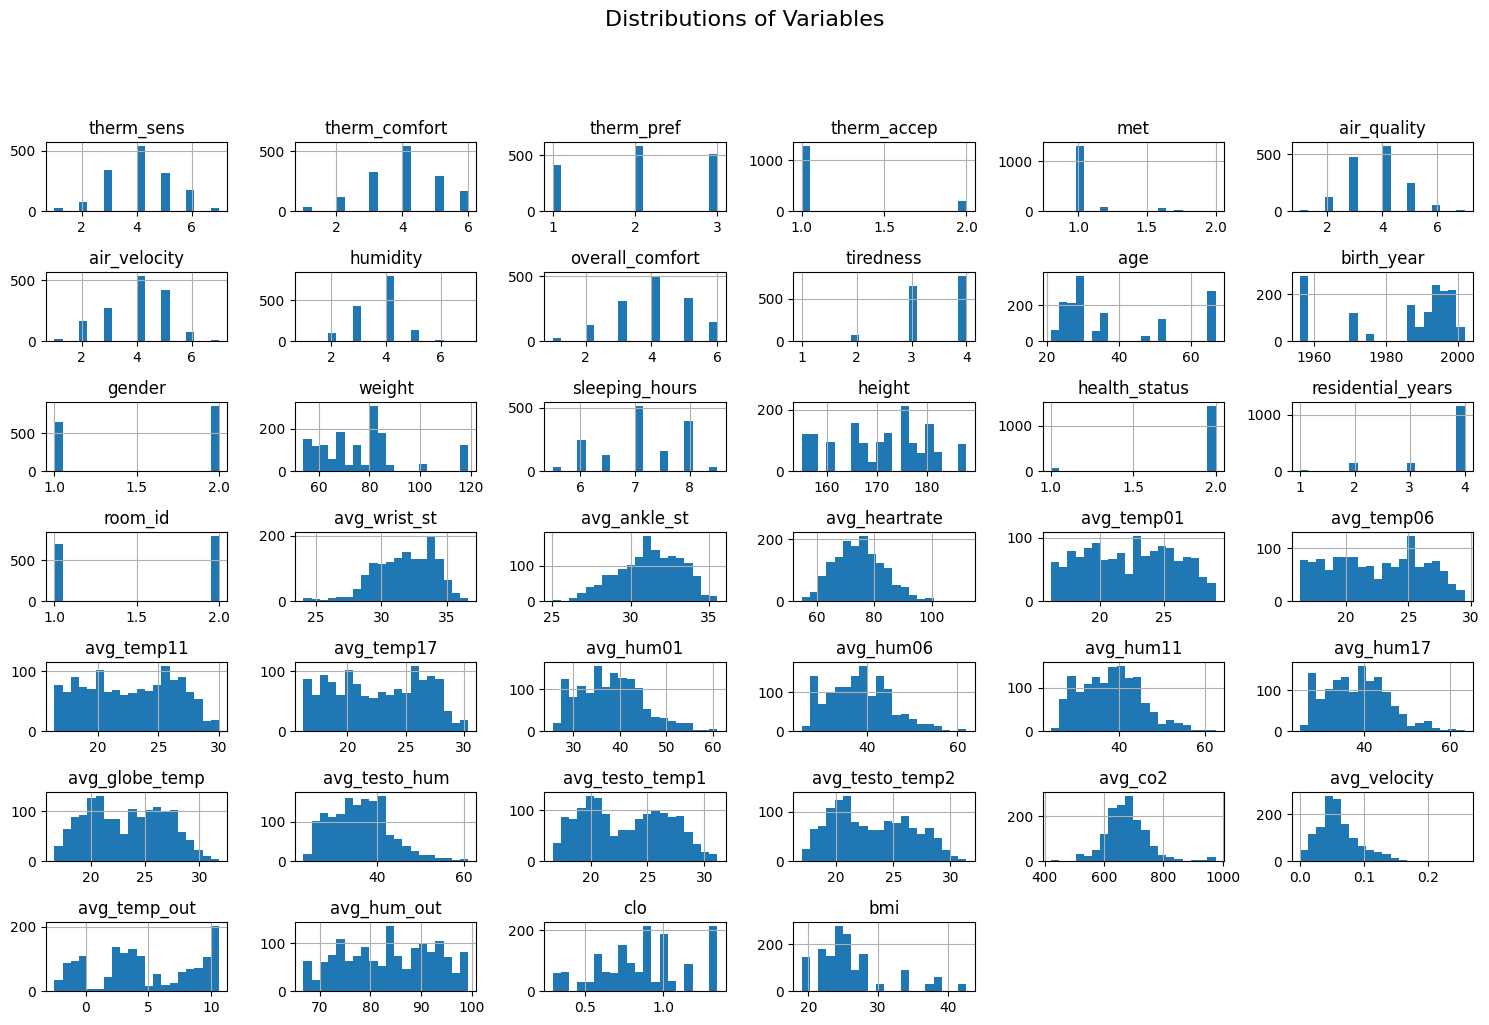

In [17]:
exp_data.hist(bins=20, figsize=(15, 10))

plt.suptitle("Distributions of Variables", size=16, y=1.02)  
plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()


TPV vs Room temp

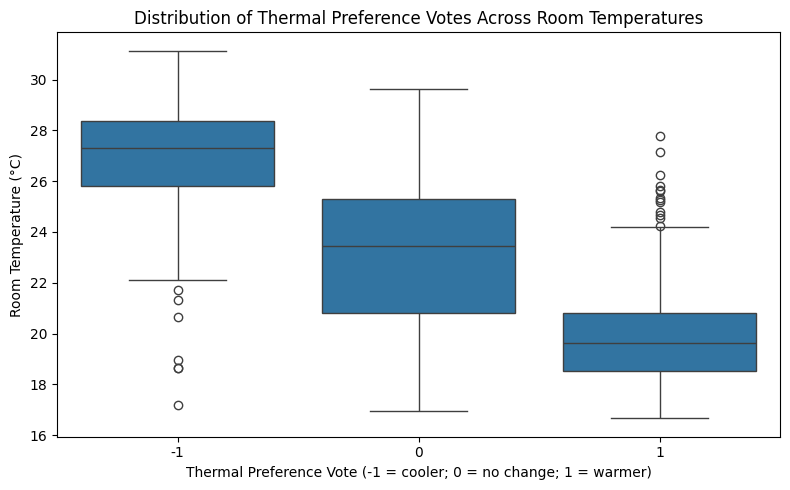

In [18]:
tpv_mapping = {3: 1, 2: 0, 1: -1}
exp_data["tpv_mapped"] = exp_data["therm_pref"].map(tpv_mapping)
plt.figure(figsize=(8, 5))
sns.boxplot(x="tpv_mapped", y="avg_testo_temp1", data=exp_data)
plt.title("Distribution of Thermal Preference Votes Across Room Temperatures")
plt.xlabel("Thermal Preference Vote (-1 = cooler; 0 = no change; 1 = warmer)")
plt.ylabel("Room Temperature (°C)")
plt.tight_layout()
plt.savefig('../EDA_plots/temp vs tpv.png', bbox_inches='tight')
plt.show()

Ankle and Wrist Temp vs TPV

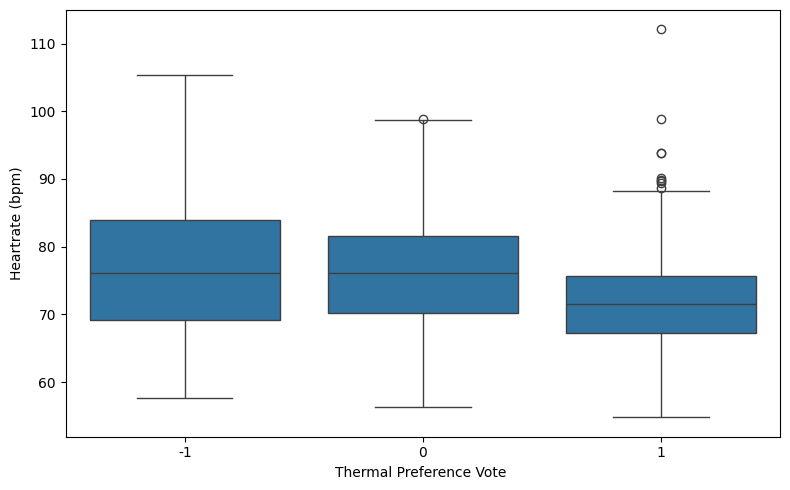

In [19]:
tpv_mapping = {3: 1, 2: 0, 1: -1}
exp_data["tpv_mapped"] = exp_data["therm_pref"].map(tpv_mapping)
plt.figure(figsize=(8, 5))
sns.boxplot(x="tpv_mapped", y="avg_heartrate", data=exp_data)
plt.xlabel("Thermal Preference Vote ")
plt.ylabel("Heartrate (bpm)")
plt.tight_layout()
plt.savefig('../EDA_plots/hr vs tpv.png', bbox_inches='tight')
plt.show()


Wrist, Ankle and room temperature vs TPV

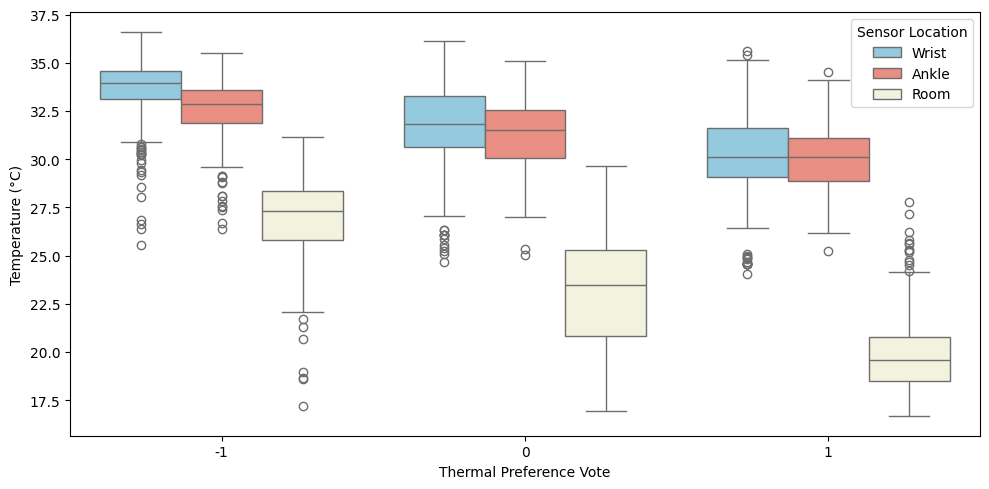

In [20]:
df_long = pd.melt(
    exp_data,
    id_vars=["tpv_mapped"],
    value_vars=["avg_wrist_st", "avg_ankle_st", "avg_testo_temp1"],
    var_name="Sensor",
    value_name="Temperature (°C)"
)

sensor_names = {
    "avg_wrist_st": "Wrist",
    "avg_ankle_st": "Ankle",
    "avg_testo_temp1": "Room"
}
df_long["Sensor"] = df_long["Sensor"].map(sensor_names)

plt.figure(figsize=(10, 5))
sns.boxplot(x="tpv_mapped", y="Temperature (°C)", hue="Sensor", data=df_long, palette=["skyblue", "salmon", "beige"])
plt.xlabel("Thermal Preference Vote")
plt.ylabel("Temperature (°C)")
plt.legend(title="Sensor Location")
plt.tight_layout()
plt.savefig('../EDA_plots/temp vs tpv.png', bbox_inches='tight')
plt.show()

